In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import files

In [2]:
# 2. Upload dataset
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [3]:
df = pd.read_csv("heart_disease.csv")

print("✅ Dataset Preview:")
print(df.head())
print("\n📊 Dataset Info:")
print(df.info())

# Features (X) and Target (y)
X = df.drop("num", axis=1)
y = (df["num"] > 0).astype(int)   # 0 = no disease, 1 = disease present

✅ Dataset Preview:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal       num  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.660004 -0.764198  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.890238  0.866450  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.176752  0.051126  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.890238 -0.764198  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.890238 -0.764198  

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 3

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Train-Test Split Done")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

✅ Train-Test Split Done
Training samples: 242
Testing samples: 61


In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # probabilities=True for ROC
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✅ {name} trained successfully")

✅ Logistic Regression trained successfully
✅ Decision Tree trained successfully
✅ Random Forest trained successfully
✅ SVM trained successfully


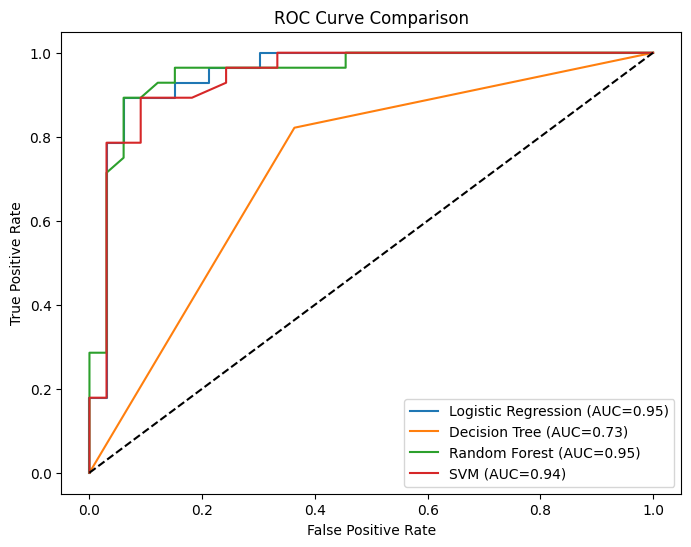

In [6]:
results = []

plt.figure(figsize=(8,6))

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]  # for ROC curve

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

# ROC plot
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [7]:
# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\n📊 Model Performance:")
print(results_df)


📊 Model Performance:
                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.868852   0.812500  0.928571  0.866667  0.951299
1        Decision Tree  0.721311   0.657143  0.821429  0.730159  0.728896
2        Random Forest  0.901639   0.843750  0.964286  0.900000  0.951299
3                  SVM  0.868852   0.833333  0.892857  0.862069  0.943723
